In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc


pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

# 1) Priprema i pregled podataka

In [2]:
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

dictionary = pd.read_csv('data/data_dictionary.csv')

Vidimo da train ima 233154 observacija i 41 atribut

In [3]:
test.shape,df.shape

((112392, 40), (233154, 41))

Target varijabla je *loan_default*. Da vidimo njenu raspodelu. Bitnije nam je da predvidimo ko ce da defoltuje na kredit tako da nam je bitno da smanjimo gresku gde netacno predvidjamo da ce klijent u roku platiti.

<AxesSubplot:>

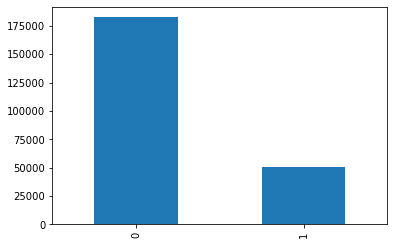

In [4]:
df.loan_default.value_counts().plot(kind = 'bar')

Iznad vidimo da target klasa 'loan default' nije uopste balansirana. To ce nam stvarati probleme kasnije kada budemo pravili modele. Izbalansiracemo pre modelovanja.

In [5]:
dictionary

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


In [6]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000,233154.00000
mean,535917.57338,54356.99353,75865.06814,74.74653,72.93609,19638.63504,69.02805,3396.88025,7.26224,1549.47715,1.00000,0.84032,0.07558,0.14494,0.02324,0.00213,289.46299,2.44064,1.03990,0.15655,165900.07694,218503.85532,218065.89865,0.05908,0.02770,0.00724,5427.79282,7295.92335,7179.99787,13105.48172,323.26845,0.38183,0.09748,0.20661,0.21707
std,68315.69371,12971.31417,18944.78129,11.45664,69.83499,3491.94957,22.14130,2238.14750,4.48223,975.26128,0.00000,0.36631,0.26432,0.35204,0.15067,0.04607,338.37478,5.21723,1.94150,0.54879,942273.58235,2374794.12577,2377743.84615,0.62679,0.31606,0.11108,170236.99464,183155.99307,182592.50007,151367.90472,15553.69134,0.95511,0.38444,0.70650,0.41225
min,417428.00000,13320.00000,37000.00000,10.03000,1.00000,10524.00000,45.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-6678296.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-574647.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,476786.25000,47145.00000,65717.00000,68.88000,14.00000,16535.00000,48.00000,1511.00000,4.00000,713.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,535978.50000,53803.00000,70946.00000,76.80000,61.00000,20333.00000,86.00000,2970.00000,6.00000,1451.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,595039.75000,60413.00000,79201.75000,83.67000,130.00000,23000.00000,86.00000,5677.00000,10.00000,2362.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,678.00000,3.00000,1.00000,0.00000,35006.50000,62500.00000,60800.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1999.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,671084.00000,990572.00000,1628992.00000,95.00000,261.00000,24803.00000,156.00000,7345.00000,22.00000,3795.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,890.00000,453.00000,144.00000,25.00000,96524920.00000,1000000000.00000,1000000000.00000,52.00000,36.00000,8.00000,36032852.00000,30000000.00000,30000000.00000,25642806.00000,4170901.00000,35.00000,20.00000,36.00000,1.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [8]:
#OVDE menjamo u nazivima kolona tacke u donje crte i sve stavljamo u lower case jer je nepregledno.
df.columns = [i.lower() for i in df.columns]
df.columns = [i.replace('.','_') for i in df.columns]

### Sada gledamo malo ove sa id sufiksima. Oni oznacavaju podatke koje nemaju direktne veze nacinom podizanja kredita. Ti podaci se ne koriste u inicijalnoj obradi i potvrdi kredita.

In [9]:
id_kolone = ['uniqueid','branch_id','supplier_id','mobileno_avl_flag','current_pincode_id','employee_code_id','manufacturer_id','state_id']

id_kol = df[id_kolone]

In [10]:
for i in id_kol.columns:
    print(i,' : distinct_value')
    print(id_kol[i].nunique(), ' : No. of unique Items')
    print('-'*30)
    print('')

uniqueid  : distinct_value
233154  : No. of unique Items
------------------------------

branch_id  : distinct_value
82  : No. of unique Items
------------------------------

supplier_id  : distinct_value
2953  : No. of unique Items
------------------------------

mobileno_avl_flag  : distinct_value
1  : No. of unique Items
------------------------------

current_pincode_id  : distinct_value
6698  : No. of unique Items
------------------------------

employee_code_id  : distinct_value
3270  : No. of unique Items
------------------------------

manufacturer_id  : distinct_value
11  : No. of unique Items
------------------------------

state_id  : distinct_value
22  : No. of unique Items
------------------------------



Ovi podaci nisu relevantni za uzimanje kredita tako da ih necemo razmatrati.
Feature importance im je svima jako mali uz to.
Moramo malo da skratimo broj atributa kako nam modelovanje ne bi trajalo 100 godina.

In [11]:
df.drop(id_kolone,axis=1,inplace=True)

### Resavanje null vrednosti

In [12]:
df.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
date_of_birth                             0
employment_type                        7661
disbursaldate                             0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                          0
pri_overdue_accts                         0
pri_current_balance                       0
pri_sanctioned_amount                     0
pri_disbursed_amount                      0
sec_no_of_accts                           0
sec_active_accts                          0
sec_overdue_accts                         0
sec_current_balance             

In [13]:
df.employment_type.value_counts()
#Vidimo sa je vecina self employed

Self employed    127635
Salaried          97858
Name: employment_type, dtype: int64

In [14]:
print(pd.crosstab(df['employment_type'], df['loan_default']))

loan_default         0      1
employment_type              
Salaried         77948  19910
Self employed    98578  29057


Vidimo da nema nekih znacajnih odnosa izmedju 'salaried' i 'self employed'.
NA vrednosti cemo resiti tako sto cemo da ih filujemo sa 'self employed' jer su one dominantne. Resenje koje je razmatrano je i samo dropovanje tih redova, ali smo se ipak odlucili za prethodno.

In [15]:
df['employment_type'] = df['employment_type'].fillna('Self employed')

In [16]:
df.employment_type.value_counts()

Self employed    135296
Salaried          97858
Name: employment_type, dtype: int64

Posto ne mozemo da gradiramo vezu izmedju self employed i salaried odradicemo get_dummies i izbaciti jednu od dobijenih dveju kolona jer su one samo inverzne onda.

In [18]:
df = pd.get_dummies(df, columns = ['employment_type'])

In [20]:
df.drop(['employment_type_Salaried'], axis=1, inplace=True)

In [21]:
df.head()

,disbursed_amount,asset_cost,ltv,date_of_birth,disbursaldate,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Self employed
0,50578,58400,89.55000,01-01-84,03-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
1,47145,65550,73.23000,31-07-85,26-09-18,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1
2,53278,61360,89.63000,24-08-85,01-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
3,57513,66113,88.48000,30-12-93,26-10-18,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1
4,52378,60300,88.39000,09-12-77,26-09-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1


### Resavanje ovih kolona sa datumima i intervalima u string formatu

Imamo 2 kolone "average_acct_age" i "credit_history_length" koje su izrazene u formatu '1yrs 11mon'. To cemo pretvoriti u broj meseci.

In [22]:
def pretvori_u_broj_meseci(k):
    god = int(k.split()[0].replace('yrs',''))
    mesec = int(k.split()[1].replace('mon',''))
    return god*12+mesec


df['credit_history_length'] = df['credit_history_length'].apply(pretvori_u_broj_meseci)
df['average_acct_age'] = df['average_acct_age'].apply(pretvori_u_broj_meseci)

In [23]:
df.head()

,disbursed_amount,asset_cost,ltv,date_of_birth,disbursaldate,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Self employed
0,50578,58400,89.55000,01-01-84,03-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23000,31-07-85,26-09-18,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1
2,53278,61360,89.63000,24-08-85,01-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,57513,66113,88.48000,30-12-93,26-10-18,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1
4,52378,60300,88.39000,09-12-77,26-09-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


### Sada da pretvorimo kolone "date_of_birth" i "disbursaldate" u godine kada je izdat kredit

In [24]:
def age(dob):
    yr = int(dob[6:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900
        
df['date_of_birth'] = df['date_of_birth'].apply(age)
df['disbursaldate'] = df['disbursaldate'].apply(age)
df['age']=df['disbursaldate']-df['date_of_birth']
df=df.drop(['disbursaldate','date_of_birth'],axis=1)

df.head()

,disbursed_amount,asset_cost,ltv,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Self employed,age
0,50578,58400,89.55000,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,47145,65550,73.23000,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,33
2,53278,61360,89.63000,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33
3,57513,66113,88.48000,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,25
4,52378,60300,88.39000,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,41


### Gledamo da pretvorimo kolonu 'perform_cns_score_description' u nesto korisno

In [25]:
df['perform_cns_score_description'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [26]:
cns = pd.crosstab(index=df['perform_cns_score_description'], columns=df['loan_default'])
cns['Percent of Defaulters'] = (cns[1] / (cns[0] + cns[1]))*100
cns

loan_default,0,1,Percent of Defaulters
perform_cns_score_description,,,
A-Very Low Risk,11783,2341,16.57462
B-Very Low Risk,7993,1208,13.12901
C-Very Low Risk,13275,2770,17.26395
D-Very Low Risk,9659,1699,14.95862
E-Low Risk,4821,1000,17.17918
F-Low Risk,6905,1580,18.62110
G-Low Risk,3202,786,19.70913
H-Medium Risk,5197,1658,24.18673
I-Medium Risk,4042,1515,27.26291


#### Grupisacemo ih po opisu od 'Very High Risk' do 'Very Low Risk' uz neocenjene

In [27]:
def zameni_neocenjene(n):
    k = n.split("-")
    
    if len(k)!=1:
        return k[0]
    else:
        return 'N'

def transformacija_CNS_Description(data):
    data['cns_score_grade']=data['perform_cns_score_description'].apply(zameni_neocenjene).astype(np.object)
    

    ocena_rizika = {'N':'Not Scored', 
                    'M':'Very High Risk', 'L':'Very High Risk', 
                    'K':'High Risk', 'J':'High Risk', 
                    'I':'Medium Risk', 'H':'Medium Risk',
                    'G':'Low Risk', 'F':'Low Risk', 'E':'Low Risk',
                    'D':'Very Low Risk', 'C':'Very Low Risk', 'B':'Very Low Risk', 'A':'Very Low Risk'}

    data['cns_score_grade'] = data['cns_score_grade'].apply(lambda x: ocena_rizika[x])
    
transformacija_CNS_Description(df)

In [28]:
df['cns_score_grade'].value_counts()

Not Scored        129785
Very Low Risk      50728
Low Risk           18294
Medium Risk        12412
High Risk          12025
Very High Risk      9910
Name: cns_score_grade, dtype: int64

In [29]:
df.head()

,disbursed_amount,asset_cost,ltv,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Self employed,age,cns_score_grade
0,50578,58400,89.55000,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,Not Scored
1,47145,65550,73.23000,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,33,Medium Risk
2,53278,61360,89.63000,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33,Not Scored
3,57513,66113,88.48000,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,25,Very High Risk
4,52378,60300,88.39000,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,41,Not Scored


In [30]:
df.drop(['perform_cns_score_description'],axis=1,inplace=True)

#OVO NAM VISE NE TREBA

In [31]:
odnos_grade = pd.crosstab(index=df['cns_score_grade'], columns=df['loan_default'])

odnos_grade['Procenat defoltovanja'] = round((odnos_grade[1]/odnos_grade.sum(axis=1))*100,2)

odnos_grade.sort_values(by='Procenat defoltovanja',ascending=False)

loan_default,0,1,Procenat defoltovanja
cns_score_grade,,,
Very High Risk,6919,2991,30.18000
High Risk,8777,3248,27.01000
Medium Risk,9239,3173,25.56000
Not Scored,99970,29815,22.97000
Low Risk,14928,3366,18.40000
Very Low Risk,42710,8018,15.81000


In [32]:
grade_map = {'Not Scored':-1, 
            'Very Low Risk':4,
            'Low Risk':3,
            'Medium Risk':2, 
            'High Risk':1,
            'Very High Risk':0}

df['cns_score_grade'] = df['cns_score_grade'].map(grade_map)

In [33]:
df.head()

,disbursed_amount,asset_cost,ltv,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Self employed,age,cns_score_grade
0,50578,58400,89.55000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,-1
1,47145,65550,73.23000,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,33,2
2,53278,61360,89.63000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33,-1
3,57513,66113,88.48000,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,25,0
4,52378,60300,88.39000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,41,-1


### Sada nemamo vise kategorickih

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   aadhar_flag                          233154 non-null  int64  
 4   pan_flag                             233154 non-null  int64  
 5   voterid_flag                         233154 non-null  int64  
 6   driving_flag                         233154 non-null  int64  
 7   passport_flag                        233154 non-null  int64  
 8   perform_cns_score                    233154 non-null  int64  
 9   pri_no_of_accts                      233154 non-null  int64  
 10  pri_active_accts                     233154 non-null  int64  
 11  pri_overdue_a

## Ajmo da resavamo ove flag-ove. Deluju nebitno, ali mozda moze desto da se izvuce iz njih.

In [35]:
df.head()

,disbursed_amount,asset_cost,ltv,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Self employed,age,cns_score_grade
0,50578,58400,89.55000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,-1
1,47145,65550,73.23000,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,33,2
2,53278,61360,89.63000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33,-1
3,57513,66113,88.48000,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,25,0
4,52378,60300,88.39000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,41,-1


In [36]:
k = ['aadhar_flag','pan_flag','voterid_flag','driving_flag','passport_flag']
for i in df[k].columns:
    print('Procenat klijenata koji je prilozio ',i,' detalje i defoltovao:',
        np.round(df[(df[i]==1) & (df['loan_default']==1)].shape[0]/(df[df[i]==1].shape[0])*100,3), '%')
    print('Procenat klijenata koji NIJE je prilozio ',i,' detalje i defoltovao:',
        np.round(df[(df[i]==0) & (df['loan_default']==1)].shape[0]/(df[df[i]==0].shape[0])*100,3), '%')
    print('-'*30)
    print('')
        

Procenat klijenata koji je prilozio  aadhar_flag  detalje i defoltovao: 20.96 %
Procenat klijenata koji NIJE je prilozio  aadhar_flag  detalje i defoltovao: 25.641 %
------------------------------

Procenat klijenata koji je prilozio  pan_flag  detalje i defoltovao: 22.002 %
Procenat klijenata koji NIJE je prilozio  pan_flag  detalje i defoltovao: 21.683 %
------------------------------

Procenat klijenata koji je prilozio  voterid_flag  detalje i defoltovao: 26.087 %
Procenat klijenata koji NIJE je prilozio  voterid_flag  detalje i defoltovao: 20.965 %
------------------------------

Procenat klijenata koji je prilozio  driving_flag  detalje i defoltovao: 20.151 %
Procenat klijenata koji NIJE je prilozio  driving_flag  detalje i defoltovao: 21.744 %
------------------------------

Procenat klijenata koji je prilozio  passport_flag  detalje i defoltovao: 14.919 %
Procenat klijenata koji NIJE je prilozio  passport_flag  detalje i defoltovao: 21.722 %
------------------------------



In [37]:
for i in df[k].columns:
    print(i,': ')
    print(df[i].value_counts(normalize=True)*100)
    print('-'*36)

aadhar_flag : 
1   84.03201
0   15.96799
Name: aadhar_flag, dtype: float64
------------------------------------
pan_flag : 
0   92.44233
1    7.55767
Name: pan_flag, dtype: float64
------------------------------------
voterid_flag : 
0   85.50572
1   14.49428
Name: voterid_flag, dtype: float64
------------------------------------
driving_flag : 
0   97.67579
1    2.32421
Name: driving_flag, dtype: float64
------------------------------------
passport_flag : 
0   99.78727
1    0.21273
Name: passport_flag, dtype: float64
------------------------------------


In [38]:
df1 = df[k]

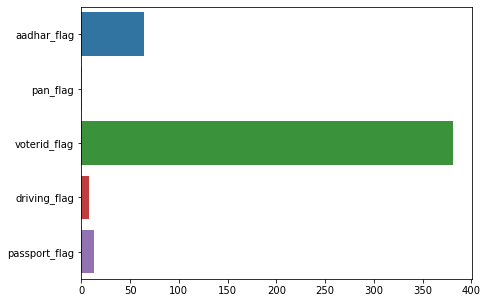

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2

selection_KBest = SelectKBest(score_func=chi2, k='all')

cols= selection_KBest.fit(df1, df['loan_default'])

plt.figure(figsize=(7,5))
sns.barplot(x=cols.scores_,y=df1.columns)
plt.show()

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(df1,df['loan_default'])

ExtraTreesClassifier()

In [41]:
pd.DataFrame(model.feature_importances_,index=df1.columns,
             columns=['Feature_Importance']).sort_values(by='Feature_Importance',ascending=False)

,Feature_Importance
aadhar_flag,0.40613
voterid_flag,0.34608
pan_flag,0.18540
driving_flag,0.04086
passport_flag,0.02154


In [42]:
X = df.drop('loan_default', axis=1)
y = df['loan_default']

In [43]:
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [44]:
pd.DataFrame(model.feature_importances_,index=X.columns,
             columns=['Feature_Importance']).sort_values(by='Feature_Importance',ascending=False)

,Feature_Importance
ltv,0.18681
asset_cost,0.18048
disbursed_amount,0.17576
age,0.11213
credit_history_length,0.03340
average_acct_age,0.03236
primary_instal_amt,0.03100
perform_cns_score,0.03048
pri_current_balance,0.02790
pri_sanctioned_amount,0.02756


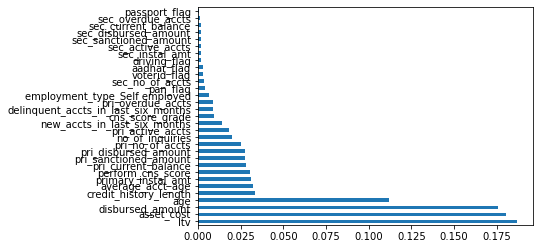

In [45]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(32).plot(kind='barh')
plt.show()

### Ovo iznad sam gledao neke feature importances za sve i za flagove. U sustini ove sec cemo spojiti sa pri jer to ima smisla, a neke flagove deluje da mozemo izbaciti, ali videcemo kasnije

## Idemo na spajace primary i secondary atributa. Ovo radimo jer ukazuju na istu stvar samo drugaciju vrstu racuna/naloga

In [44]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'aadhar_flag', 'pan_flag',
       'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score',
       'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'no_of_inquiries', 'loan_default',
       'employment_type_Salaried', 'employment_type_Self employed', 'age',
       'cns_score_grade'],
      dtype='object')

In [46]:
pri_sec_kolone = ['pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_instal_amt', 'sec_instal_amt']

pri_sec_df = df[pri_sec_kolone]

In [47]:
def new_col(data):

    data['no_of_accts'] = data['pri_no_of_accts'] + data['sec_no_of_accts']

    data['active_accts'] = data['pri_active_accts'] + data['sec_active_accts']

    data['overdue_accts'] = data['pri_overdue_accts'] + data['sec_overdue_accts']

    data['current_balance'] = data['pri_current_balance'] + data['sec_current_balance']

    data['sanctioned_amount'] = data['pri_sanctioned_amount'] + data['sec_sanctioned_amount']

    data['disbursed_amount2'] = data['pri_disbursed_amount'] + data['sec_disbursed_amount']

    data['instal_amt'] = data['primary_instal_amt'] + data['sec_instal_amt']
    
    data.drop(pri_sec_kolone, axis=1, inplace=True)

new_col(df)

In [47]:
df.head()

,disbursed_amount,asset_cost,ltv,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Salaried,employment_type_Self employed,age,cns_score_grade,no_of_accts,active_accts,overdue_accts,current_balance,sanctioned_amount,disbursed_amount2,instal_amt
0,50578,58400,89.55000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,34,-1,0,0,0,0,0,0,0
1,47145,65550,73.23000,1,0,0,0,0,598,0,1,23,23,0,1,0,1,33,2,1,1,1,27600,50200,50200,1991
2,53278,61360,89.63000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,33,-1,0,0,0,0,0,0,0
3,57513,66113,88.48000,1,0,0,0,0,305,0,0,8,15,1,1,0,1,25,0,3,0,0,0,0,0,31
4,52378,60300,88.39000,1,0,0,0,0,0,0,0,0,0,1,1,0,1,41,-1,0,0,0,0,0,0,0


## Sada gledamo korelacije

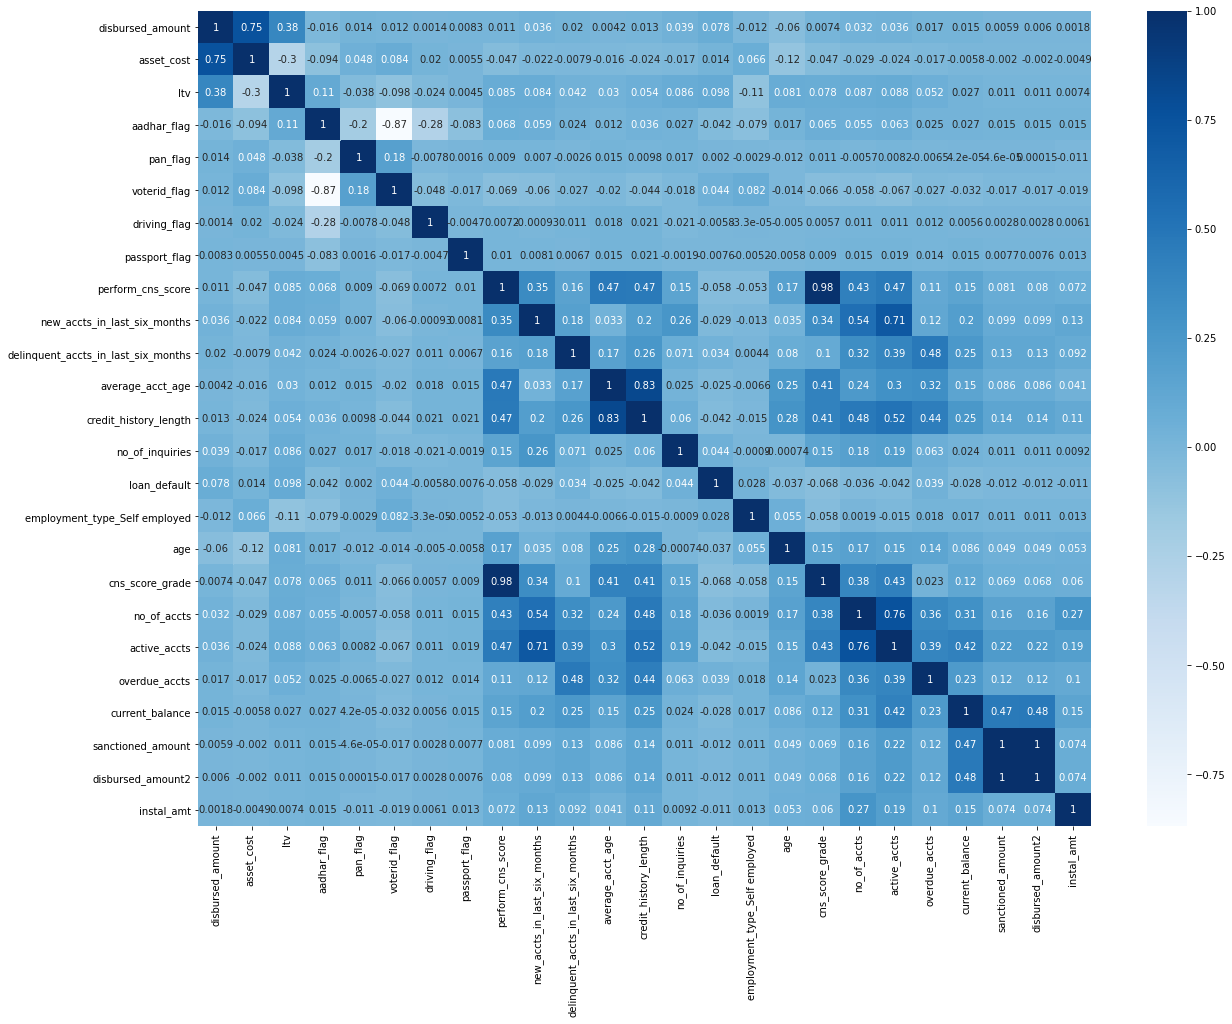

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

Vidimo visoku korelaciju izmedju

    sanctioned_amount i disboursed_amount = 1
    
    cns_score_grade i perform_cns_score = 0.98
    
    credit_history_lenght i avrage_acct_age = 0.83
    
    no_of_accts i overdue_accts = 0.76
    
    active_accts i new_accts_in_the_last_six_months = 0.71
    
Dropovacemo one atribute prva dva parova koji imaju manju feature importance (gore izracunata) jer su zaista gotovo 100% korelisani, a ostale cemo ostaviti.

In [48]:
df.drop(['sanctioned_amount','cns_score_grade'], axis=1, inplace=True)

### Autlajeri

In [49]:
df.columns
p = ['disbursed_amount', 'disbursed_amount2', 'asset_cost', 'ltv', 'perform_cns_score',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries','age', 'no_of_accts',
       'active_accts', 'overdue_accts', 'current_balance', 'instal_amt']

df_out = df[p]

In [50]:
df_out.shape
df_out.head()

,disbursed_amount,disbursed_amount2,asset_cost,ltv,perform_cns_score,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,age,no_of_accts,active_accts,overdue_accts,current_balance,instal_amt
0,50578,0,58400,89.55000,0,0,0,0,0,0,34,0,0,0,0,0
1,47145,50200,65550,73.23000,598,0,1,23,23,0,33,1,1,1,27600,1991
2,53278,0,61360,89.63000,0,0,0,0,0,0,33,0,0,0,0,0
3,57513,0,66113,88.48000,305,0,0,8,15,1,25,3,0,0,0,31
4,52378,0,60300,88.39000,0,0,0,0,0,1,41,0,0,0,0,0


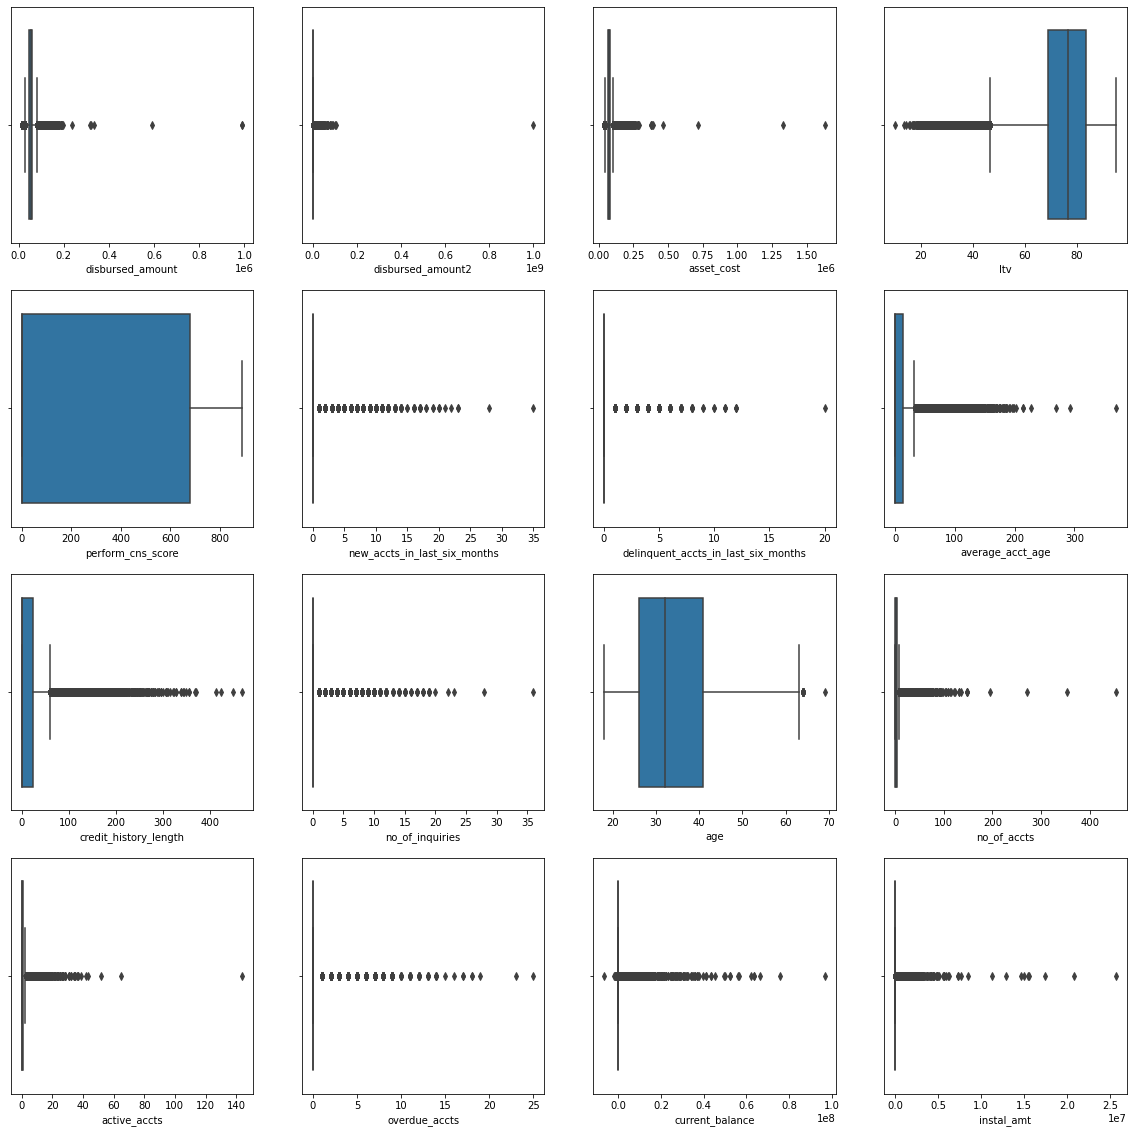

In [51]:
plt.figure(figsize=(20,20))
x = 1
for column in df_out.columns:
    if x<=16:
        plt.subplot(4,4,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

In [52]:
acc6 = pd.crosstab(index=df['new_accts_in_last_six_months'], columns=df['loan_default'])
acc6['Percent of Defaulters'] = (acc6[1] / (acc6[0] + acc6[1]))*100
acc6

loan_default,0,1,Percent of Defaulters
new_accts_in_last_six_months,,,
0,140812,40682,22.41507
1,25735,6364,19.82616
2,8931,2084,18.91966
3,3690,768,17.22746
4,1609,348,17.78232
5,800,164,17.01245
6,398,82,17.08333
7,255,47,15.56291
8,123,24,16.32653


In [53]:
da = pd.crosstab(index=df['delinquent_accts_in_last_six_months'], columns=df['loan_default'])
da['Percent of Defaulters'] = (da[1] / (da[0] + da[1]))*100
da

loan_default,0,1,Percent of Defaulters
delinquent_accts_in_last_six_months,,,
0,169277,45682,21.25149
1,10922,4019,26.89914
2,1784,686,27.77328
3,385,152,28.30540
4,96,42,30.43478
5,42,16,27.58621
6,17,3,15.00000
7,8,5,38.46154
8,4,3,42.85714


In [54]:
aage = pd.crosstab(index=df['average_acct_age'], columns=df['loan_default'])
aage['Percent of Defaulters'] = (aage[1] / (aage[0] + aage[1]))*100
aage

loan_default,0,1,Percent of Defaulters
average_acct_age,,,
0,91716,27657,23.16856
1,1679,528,23.92388
2,2295,638,21.75247
3,2761,809,22.66106
4,3382,887,20.77770
5,3518,836,19.20073
6,4842,1186,19.67485
7,4332,1034,19.26947
8,3939,953,19.48078


In [55]:
df.loc[df['new_accts_in_last_six_months'] > 0, 'new_accts_in_last_six_months'] = 1
df.loc[df['no_of_inquiries'] > 0, 'no_of_inquiries'] = 1
df.loc[df['overdue_accts'] > 0, 'overdue_accts'] = 1
df.loc[df['delinquent_accts_in_last_six_months'] > 0, 'delinquent_accts_in_last_six_months'] = 1

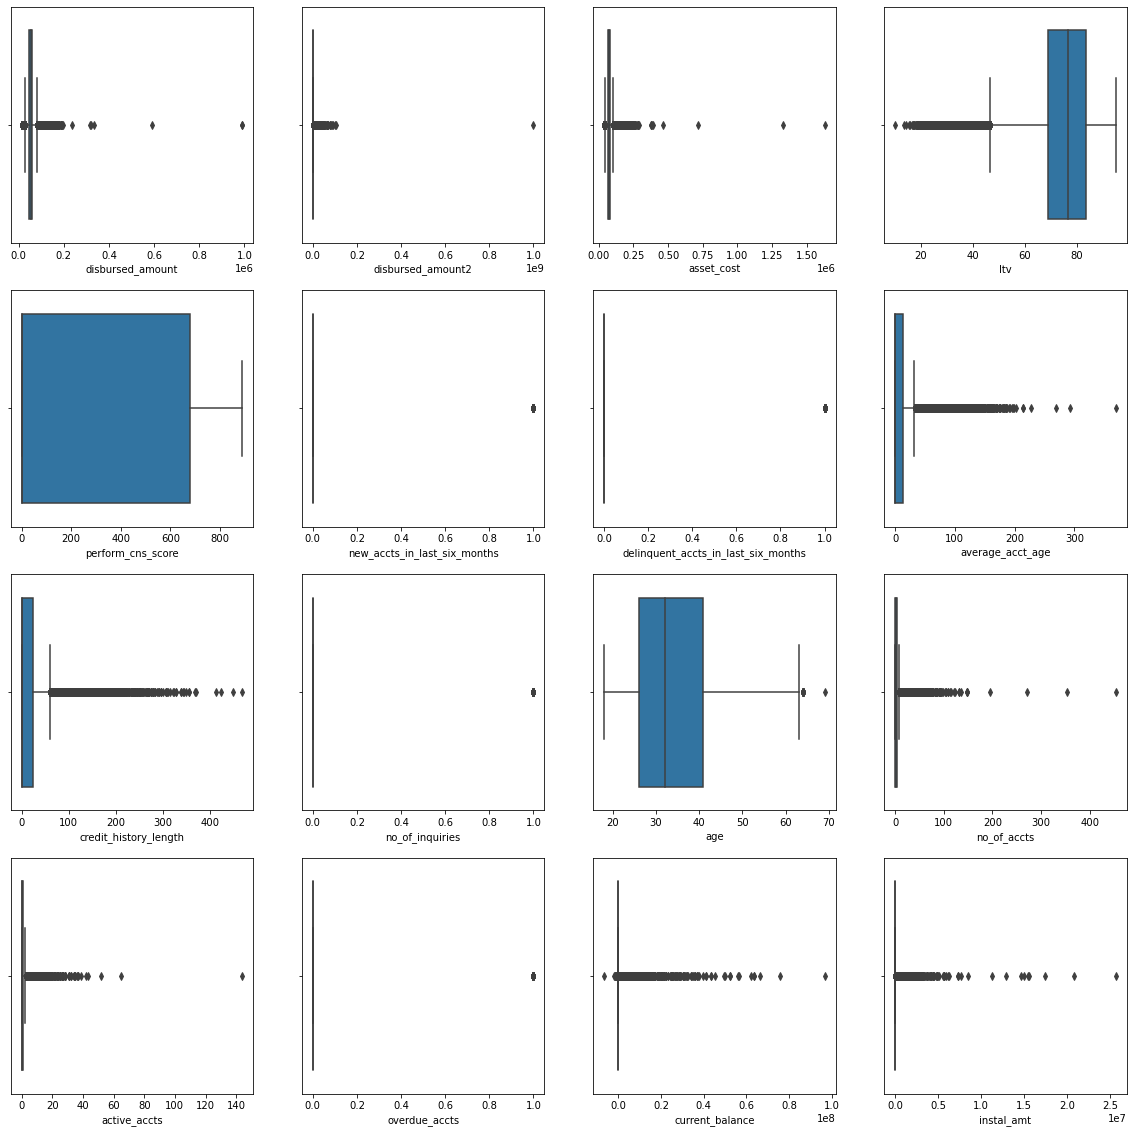

In [56]:
plt.figure(figsize=(20,20))
x = 1
for column in df_out.columns:
    if x<=16:
        plt.subplot(4,4,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

In [57]:
p2 = ['disbursed_amount', 'disbursed_amount2', 'asset_cost', 'ltv', 'average_acct_age', 'credit_history_length', 'age', 'no_of_accts',
       'active_accts', 'current_balance', 'instal_amt']
df_out2 = df[p2]
Q1 = df_out2.quantile(0.25)
Q3 = df_out2.quantile(0.75)
IQR = Q3 - Q1
((df_out2 < (Q1 - 1.5 * IQR)) | (df_out2 > (Q3 + 1.5 * IQR))).sum()

disbursed_amount          9868
disbursed_amount2        39801
asset_cost               24388
ltv                       6170
average_acct_age         15924
credit_history_length    16056
age                         22
no_of_accts              22628
active_accts             33445
current_balance          40933
instal_amt               38842
dtype: int64

In [58]:
index = df[(df['age'] >= (Q3['age'] + 1.5 * IQR['age']))].index
df.drop(index, inplace=True)
df['age'].describe()

count   233132.00000
mean        34.09810
std          9.80208
min         18.00000
25%         26.00000
50%         32.00000
75%         41.00000
max         63.00000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

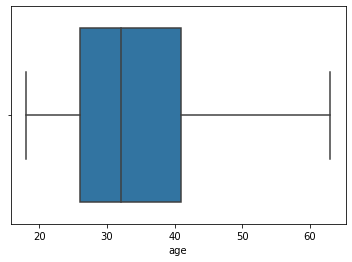

In [59]:
sns.boxplot(df['age'])

In [60]:
p3 = ['disbursed_amount', 'disbursed_amount2', 'asset_cost', 'ltv', 'average_acct_age', 'credit_history_length', 'no_of_accts',
       'active_accts', 'current_balance', 'instal_amt']
df_out3 = df[p3]

In [61]:
for column in df_out3.columns:
    df.loc[df[column] > (Q3[column] + 1.5 * IQR[column]), column] = Q3[column] + 1.5 * IQR[column]
    df.loc[df[column] < (Q1[column] - 1.5 * IQR[column]), column] = Q1[column] - 1.5 * IQR[column]

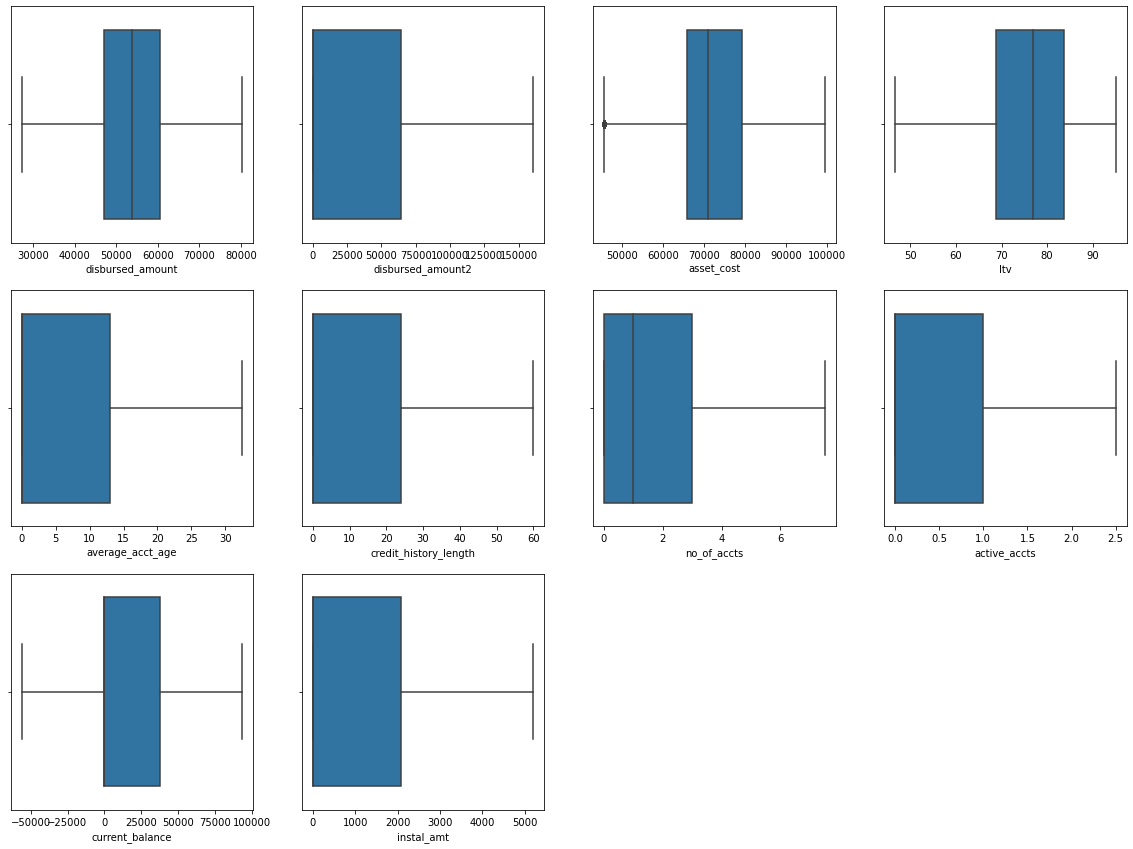

In [62]:
plt.figure(figsize=(20,20))
x = 1
for column in df_out3.columns:
    if x<=16:
        plt.subplot(4,4,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

In [63]:
df.describe()

,disbursed_amount,asset_cost,ltv,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Self employed,age,no_of_accts,active_accts,overdue_accts,current_balance,disbursed_amount2,instal_amt
count,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000
mean,54009.96612,73954.39623,74.93404,0.84031,0.07557,0.14495,0.02324,0.00213,289.46045,0.22157,0.07804,7.62303,13.52506,0.13379,0.21707,0.58027,34.09810,1.81654,0.72647,0.11684,22915.35543,40698.24771,1245.55864
std,11242.80401,12522.78939,10.88334,0.36632,0.26430,0.35205,0.15068,0.04608,338.37121,0.41531,0.26824,10.42750,19.21470,0.34043,0.41225,0.49352,9.80208,2.53208,0.96098,0.32123,36538.45470,62181.60978,2030.69650
min,27243.00000,45489.87500,46.69500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,18.00000,0.00000,0.00000,0.00000,-56004.00000,0.00000,0.00000
25%,47145.00000,65718.00000,68.88000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,26.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,53803.00000,70948.00000,76.80000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,32.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,60413.00000,79203.00000,83.67000,1.00000,0.00000,0.00000,0.00000,0.00000,678.00000,0.00000,0.00000,13.00000,24.00000,0.00000,0.00000,1.00000,41.00000,3.00000,1.00000,0.00000,37340.00000,64291.50000,2083.00000
max,80315.00000,99428.87500,95.00000,1.00000,1.00000,1.00000,1.00000,1.00000,890.00000,1.00000,1.00000,32.50000,60.00000,1.00000,1.00000,1.00000,63.00000,7.50000,2.50000,1.00000,93340.00000,160710.00000,5207.50000


In [64]:
p4 = ['disbursed_amount', 'asset_cost', 'ltv', 'perform_cns_score', 'average_acct_age', 'credit_history_length', 'age', 'no_of_accts',
       'active_accts', 'current_balance', 'disbursed_amount2', 'instal_amt']

In [65]:
scaler = MinMaxScaler()
df[p4] = scaler.fit_transform(df[p4])
df.describe()

,disbursed_amount,asset_cost,ltv,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,employment_type_Self employed,age,no_of_accts,active_accts,overdue_accts,current_balance,disbursed_amount2,instal_amt
count,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000,233132.00000
mean,0.50435,0.52772,0.58460,0.84031,0.07557,0.14495,0.02324,0.00213,0.32524,0.22157,0.07804,0.23455,0.22542,0.13379,0.21707,0.58027,0.35774,0.24220,0.29059,0.11684,0.52844,0.25324,0.23919
std,0.21184,0.23217,0.22530,0.36632,0.26430,0.35205,0.15068,0.04608,0.38019,0.41531,0.26824,0.32085,0.32025,0.34043,0.41225,0.49352,0.21782,0.33761,0.38439,0.32123,0.24466,0.38692,0.38996
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.37500,0.37502,0.45927,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.17778,0.00000,0.00000,0.00000,0.37500,0.00000,0.00000
50%,0.50045,0.47198,0.62323,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.31111,0.13333,0.00000,0.00000,0.37500,0.00000,0.00000
75%,0.62500,0.62502,0.76545,1.00000,0.00000,0.00000,0.00000,0.00000,0.76180,0.00000,0.00000,0.40000,0.40000,0.00000,0.00000,1.00000,0.51111,0.40000,0.40000,0.00000,0.62503,0.40005,0.40000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


# 2) MODELOVANJE

In [66]:
X = df.drop('loan_default', axis=1)
y = df['loan_default']

## Kada smo pustili neke modele da rade na celom train setu trebalo je bukvalno nekoliko sati da se izvrse neki. Ako bi smo pustili gridcv da nadje najbolje hiperparametre za Gradient boosting classifier potrebno bi bilo vise od 24h sigurno da se izvrsi ako ne i znatno vise, tako da smo usled vremena i prakticnosti bili primorani da uzmemo sample od 10% i sa njime radimo. I u ovom slucaju je za gore pomenuti zadatak bilo potrebno 5+ sati.

In [67]:
df_mini = df.sample(frac = 0.1,random_state = 2021,axis= 0)

In [68]:
df_mini.shape

(23313, 23)

In [69]:
X = df_mini.drop('loan_default', axis=1)
y = df_mini['loan_default']

In [70]:
smote = SMOTE()
X_tf,y_tf = smote.fit_resample(X,y)
X_tf.shape, y_tf.shape

((36366, 22), (36366,))

In [72]:
#scaler = preprocessing.RobustScaler()
#X_tf = scaler.fit_transform(X_tf)

# Split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(X_tf,y_tf,test_size = .1, random_state = 2021)

print(x_train.shape[0], x_test.shape[0])

32729 3637


In [73]:
accuracy = {}
roc_r = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitovanje modela
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    #Metrike
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    
    
    #ROC Score
    roc_score = roc_auc_score(y_test, pred)*100
    roc_r[model_name] = roc_score
    print('roc_auc_score',roc_score)
    
    # Matrica konfuzije
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    
    #ROC Score
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)*100
    
    #ROC Plot
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## 2.1) KNN

In [89]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=15, n_jobs=4)

train_model(knn, 'K Nearest Neighbour')

K Nearest Neighbour


MemoryError: Unable to allocate 227. MiB for an array with shape (3637, 8182) and data type float64

## Koristeci GridSearchCV trazimo najbolje hiperparametre za ovaj model i primenjujemo ih

In [86]:
knn_params = {'n_neighbors': [3,5,7,9,11,15,21,50],'metric': ['euclidean','manhattan','chebyshev','mahalanobis']}  #vrednosti parametara koje treba probati
grid1 = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10, scoring='roc_auc')
grid1.fit(x_train,y_train)

print('Best param: ', grid1.best_params_)

Best param:  {'metric': 'manhattan', 'n_neighbors': 3}


K Nearest Neighbour
accuracy_score 79.68105581523234
precision_score 73.53700516351118
recall_score 93.23513366066557
f1_score 82.22275679576619
roc_auc_score 79.57211228487824
confusion_matrix
      0     1
0  1189   615
1   124  1709


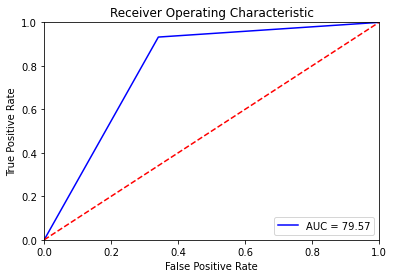

In [93]:
knn1 = KNeighborsClassifier(weights='distance', metric='manhattan', n_neighbors=3, n_jobs=4)

train_model(knn1, 'K Nearest Neighbour')

## 2.2)Gradient Boosting Classiefier

GradientBoostingClassifier
accuracy_score 83.91531481990651
precision_score 87.77239709443099
recall_score 79.10529187124932
f1_score 83.21377331420372
roc_auc_score 83.95397631256479
confusion_matrix
      0     1
0  1602   202
1   383  1450


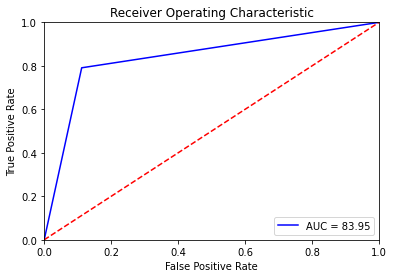

In [82]:
gbc = GradientBoostingClassifier(n_estimators=100, min_samples_split=5, max_depth=15)

train_model(gbc, 'GradientBoostingClassifier')

### Stelujemo parametre. Ovo ne pokretati vise! Trajalo je 8 sati!

In [85]:
gbc1 = GradientBoostingClassifier(n_estimators=100)
parameters = {'min_samples_split': [2,3,4,5,6,7,8,9,10], 'max_depth':[10,15,20,25]}

#grid = GridSearchCV(gbc1, parameters, cv=5, scoring='accuracy')
#grid.fit(x_train,y_train)
print('Best param: ', grid.best_params_) 

Best param:  {'max_depth': 15, 'min_samples_split': 2}


GradientBoostingClassifier
accuracy_score 84.05279076161672
precision_score 87.80929390464695
recall_score 79.37806873977087
f1_score 83.38108882521492
roc_auc_score 84.09036474682556
confusion_matrix
      0     1
0  1602   202
1   378  1455


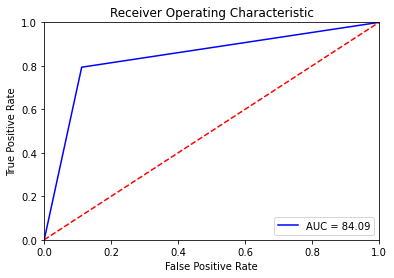

In [94]:
gbc2 = GradientBoostingClassifier(n_estimators=100, min_samples_split=2, max_depth=15)

#train_model(gbc2, 'GradientBoostingClassifier')

### Sada gledamo feature importance. Vidimo da nismo izbacili passport flag koji ne doprinosti nista na kraju tako da sada cemo ga izbaciti i on dovodi do boljih rezultata. Dalja izbacivanja su se pokazala kao losa jer ne poboljsavaju (malo pogorsavaju) izlaz

In [101]:
gbc2.feature_importances_

array([0.12187821, 0.10799392, 0.15295992, 0.00713983, 0.00880558,
       0.00873917, 0.0028781 , 0.00028351, 0.07155218, 0.00562401,
       0.00474725, 0.03556724, 0.03546777, 0.01099531, 0.01604226,
       0.22898308, 0.06292211, 0.02298097, 0.00392751, 0.02312179,
       0.03519502, 0.03219524])

<AxesSubplot:ylabel='att'>

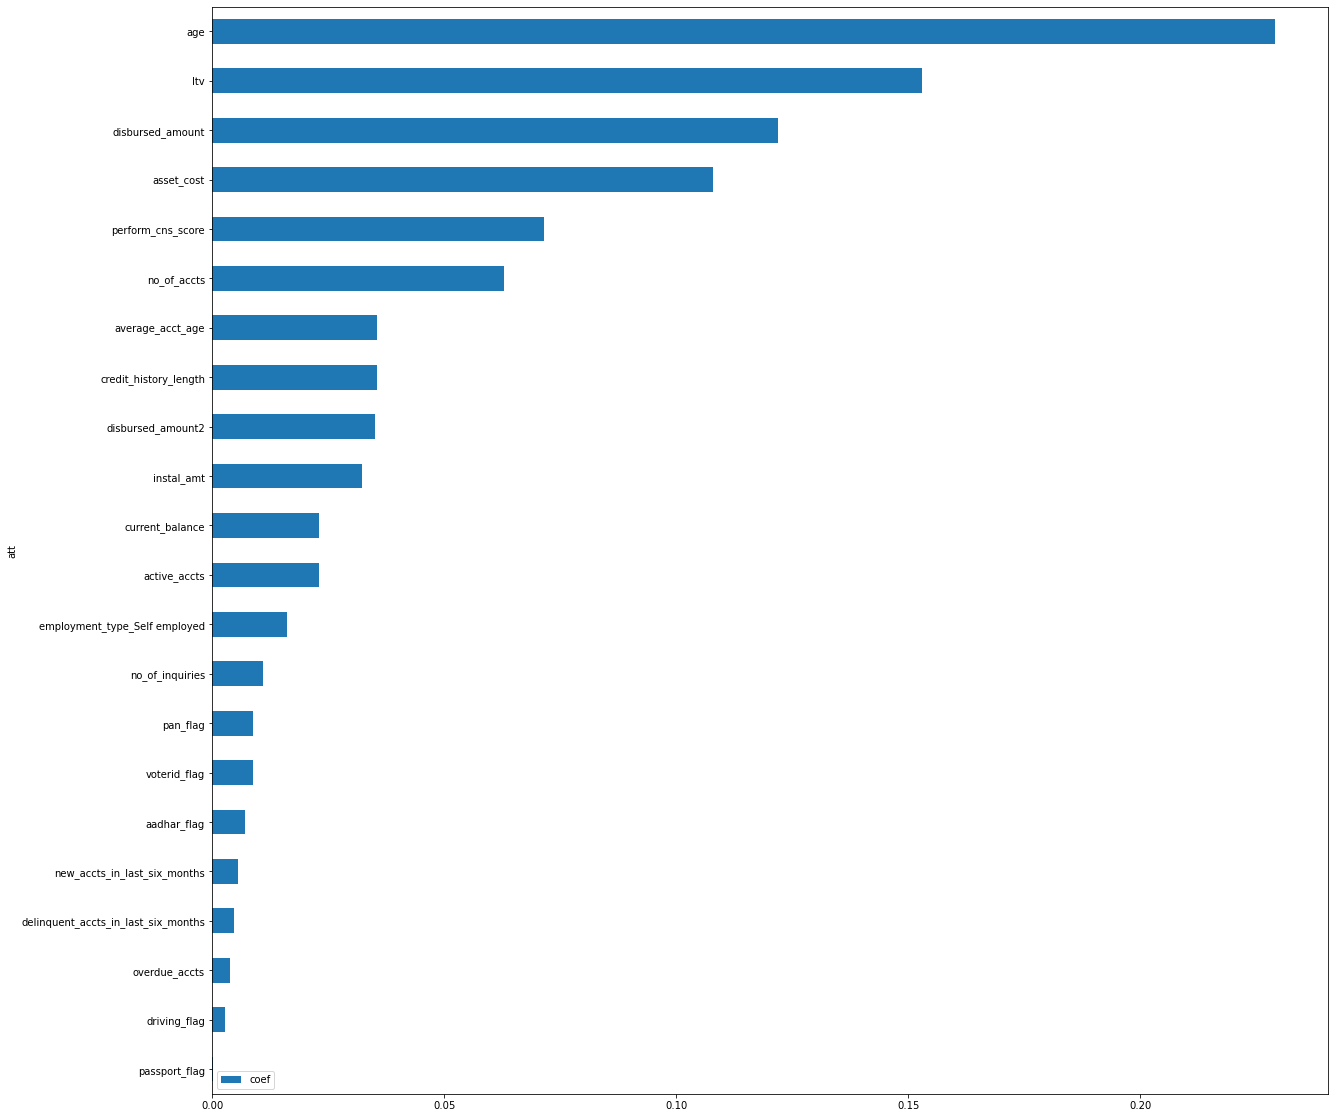

In [102]:
coefs = pd.DataFrame({'att':x_train.columns, 'coef':gbc2.feature_importances_}).sort_values(by='coef',ascending=True).replace(0,np.nan).dropna()
coefs.plot.barh(x='att',y='coef',figsize=(20, 20))

In [77]:
x_train = x_train.drop('passport_flag',axis =1)
x_test = x_test.drop('passport_flag',axis =1) 

GradientBoostingClassifier
accuracy_score 83.77783887819632
precision_score 86.17984308992155
recall_score 79.82112912241476
f1_score 82.8786999419617
roc_auc_score 83.71467711531993
confusion_matrix
      0     1
0  1619   229
1   361  1428


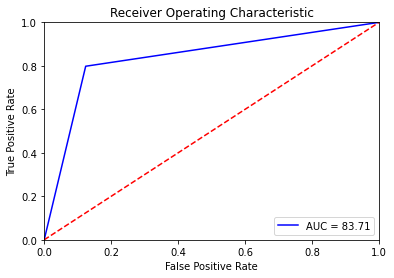

In [78]:
gbc3_fi = GradientBoostingClassifier(n_estimators=100, min_samples_split=2, max_depth=15)

train_model(gbc3_fi, 'GradientBoostingClassifier')

In [79]:
x_train.head()

,disbursed_amount,asset_cost,ltv,aadhar_flag,pan_flag,voterid_flag,driving_flag,perform_cns_score,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,employment_type_Self employed,age,no_of_accts,active_accts,overdue_accts,current_balance,disbursed_amount2,instal_amt
24795,0.81830,0.81119,0.72003,1,0,0,0,0.01876,1,0,0.04309,0.02334,0,0,0.46451,0.13333,0.40000,0,0.41738,0.06753,0.00000
20701,0.30852,0.23332,0.68740,1,0,0,0,0.00000,0,0,0.00000,0.00000,0,0,0.46667,0.00000,0.00000,0,0.37500,0.00000,0.00000
27739,0.85429,0.96413,0.60504,1,0,0,0,0.00000,0,0,0.00000,0.00000,0,0,0.06667,0.00000,0.00000,0,0.37500,0.00000,0.00000
9683,0.59383,0.53959,0.69299,1,0,0,0,0.00000,0,0,0.00000,0.00000,1,0,0.13333,0.00000,0.00000,0,0.37500,0.00000,0.00000
31939,0.41315,0.40984,0.60721,0,0,1,0,0.80087,1,0,0.29935,0.35589,1,0,0.38193,0.64723,0.82916,0,0.89762,0.57210,0.96619


### Ispostavilja se da jedino ako izbacimo passport_flag on poboljsava rezultat svega sto smo probali, tako da uzimamo to kao standard sada.

## 2.3) Random forrest

Random Forest Classifier
accuracy_score 73.46714324993127
precision_score 70.0
recall_score 80.6036892118502
f1_score 74.92855287087555
roc_auc_score 73.58106538514588
confusion_matrix
      0     1
0  1230   618
1   347  1442


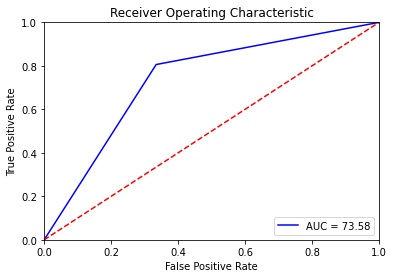

In [81]:
ran_forest_ran = RandomForestClassifier(n_estimators = 100, max_depth=15, 
                             min_samples_split=5, min_samples_leaf=3)

train_model(ran_forest_ran, 'Random Forest Classifier')

In [83]:

forest = RandomForestClassifier(n_estimators=10, n_jobs=None, random_state=2021, class_weight='balanced')
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9,11,21],'max_depth': [5,10,15,20,25]}

grid_rf = GridSearchCV(forest, parameters, cv=5, scoring='roc_auc')
grid_rf.fit(x_train,y_train)
print('Best param: ', grid_rf.best_params_) 

Best param:  {'max_depth': 25, 'max_features': 4, 'min_samples_leaf': 3}


Random Forest Classifier
accuracy_score 77.75639263128953
precision_score 75.33609100310238
recall_score 81.44214645053103
f1_score 78.27021219446682
roc_auc_score 77.81522906942135
confusion_matrix
      0     1
0  1371   477
1   332  1457


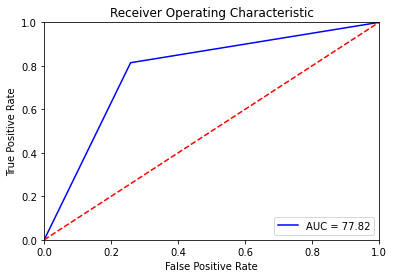

In [84]:
ran_forest_ran2 = RandomForestClassifier(n_estimators = 100, max_depth=25, 
                             min_samples_split=3, min_samples_leaf=3, max_features= 4)

train_model(ran_forest_ran2, 'Random Forest Classifier')

In [86]:
ran_forest_ran2.feature_importances_

array([0.12585645, 0.11008524, 0.14383206, 0.00873777, 0.00737404,
       0.00861796, 0.00241935, 0.07999703, 0.00741659, 0.00703693,
       0.05242694, 0.05309996, 0.01190378, 0.01858576, 0.13180868,
       0.05623022, 0.03861242, 0.00947966, 0.03833618, 0.04680836,
       0.04133462])

<AxesSubplot:ylabel='att'>

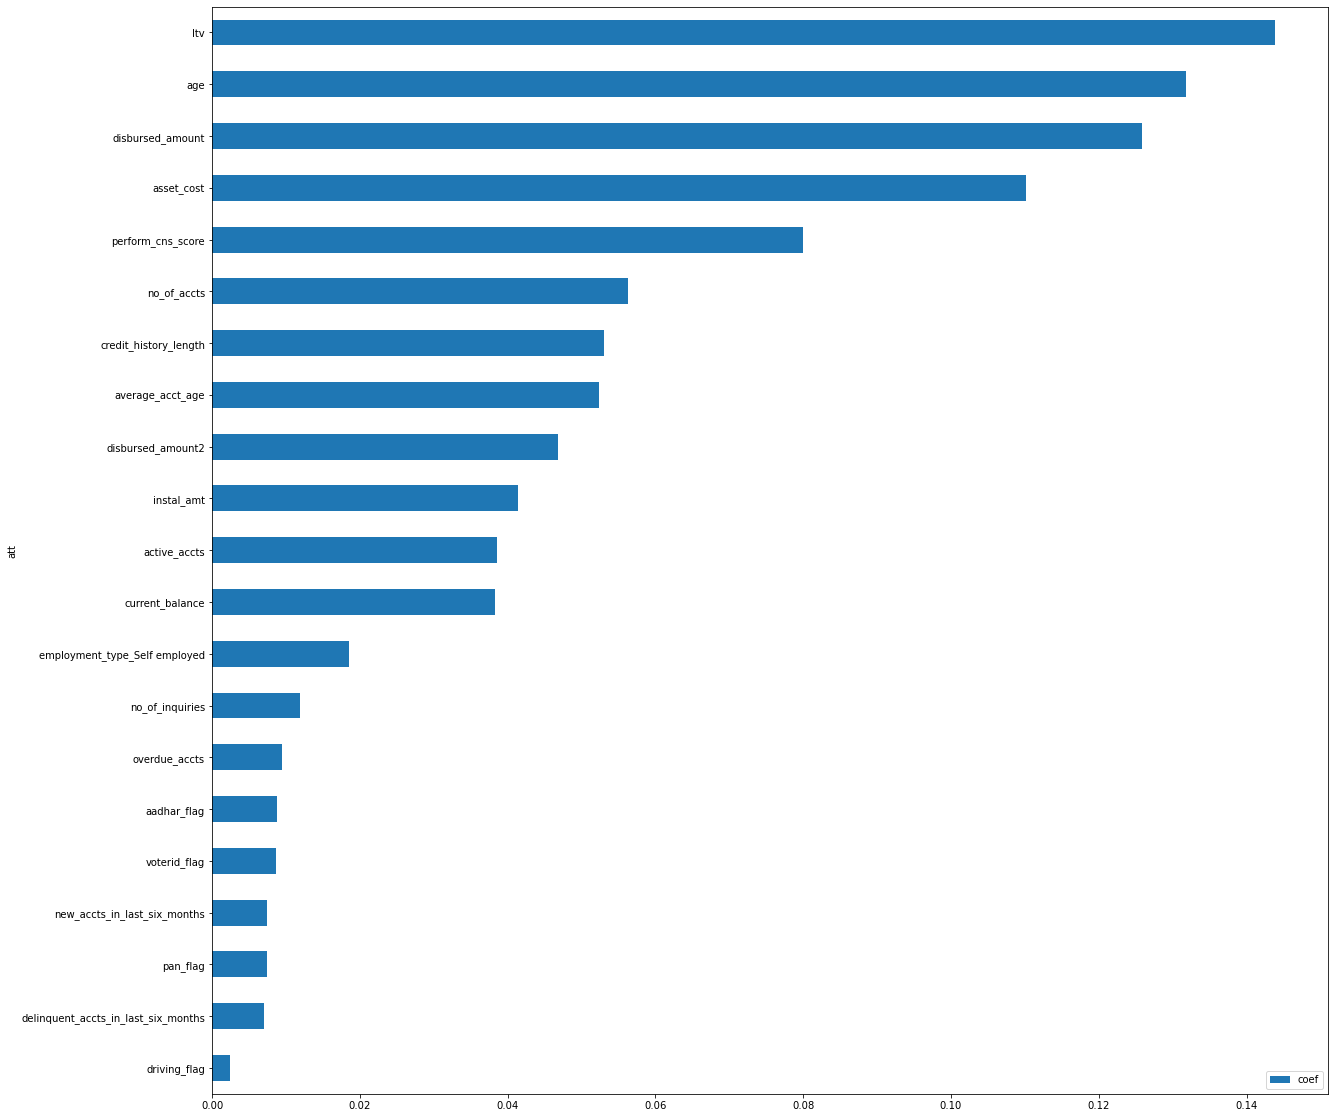

In [87]:
coefs = pd.DataFrame({'att':x_train.columns, 'coef':ran_forest_ran2.feature_importances_}).sort_values(by='coef',ascending=True).replace(0,np.nan).dropna()
coefs.plot.barh(x='att',y='coef',figsize=(20, 20))